# Import supporting package

In [1]:
import xarray as xr
import numpy as np
import copy

from uncertainties import ufloat
from uncertainties import unumpy as unp
from uncertainties import umath
import random
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 12

from DataContainer.ReadData import read_hdf5_file
from Analyser.ImagingAnalyser import ImageAnalyser
from Analyser.FitAnalyser import FitAnalyser
from Analyser.FitAnalyser import NewFitModel, DensityProfileBEC2dModel
from ToolFunction.ToolFunction import *

from scipy.optimize import curve_fit

from ToolFunction.HomeMadeXarrayFunction import errorbar, dataarray_plot_errorbar
xr.plot.dataarray_plot.errorbar = errorbar
xr.plot.accessor.DataArrayPlotAccessor.errorbar = dataarray_plot_errorbar

imageAnalyser = ImageAnalyser()

# %matplotlib notebook

## Start a client for parallel computing

In [2]:
from dask.distributed import Client
client = Client(n_workers=8, threads_per_worker=16, processes=True, memory_limit='20GB')
client

2023-08-23 16:46:30,819 - distributed.nanny.memory - WARNING - Ignoring provided memory limit 20GB due to system memory limit of 15.78 GiB
2023-08-23 16:46:30,836 - distributed.nanny.memory - WARNING - Ignoring provided memory limit 20GB due to system memory limit of 15.78 GiB
2023-08-23 16:46:30,855 - distributed.nanny.memory - WARNING - Ignoring provided memory limit 20GB due to system memory limit of 15.78 GiB
2023-08-23 16:46:30,867 - distributed.nanny.memory - WARNING - Ignoring provided memory limit 20GB due to system memory limit of 15.78 GiB
2023-08-23 16:46:30,878 - distributed.nanny.memory - WARNING - Ignoring provided memory limit 20GB due to system memory limit of 15.78 GiB
2023-08-23 16:46:30,888 - distributed.nanny.memory - WARNING - Ignoring provided memory limit 20GB due to system memory limit of 15.78 GiB
2023-08-23 16:46:30,900 - distributed.nanny.memory - WARNING - Ignoring provided memory limit 20GB due to system memory limit of 15.78 GiB
2023-08-23 16:46:30,910 - d

<Client: 'tcp://127.0.0.1:57184' processes=8 threads=128, memory=126.24 GiB>

## Set global path for experiment

In [6]:
groupList = [
    "images/MOT_3D_Camera/in_situ_absorption",
    "images/ODT_1_Axis_Camera/in_situ_absorption",
    "images/ODT_2_Axis_Camera/in_situ_absorption",
]

dskey = {
    "images/MOT_3D_Camera/in_situ_absorption": "camera_0",
    "images/ODT_1_Axis_Camera/in_situ_absorption": "camera_1",
    "images/ODT_2_Axis_Camera/in_situ_absorption": "camera_2",
}


# Evaporative Cooling

In [7]:
img_dir = '//DyLabNAS/Data/'
SequenceName = "Evaporative_Cooling" + "/"
folderPath = img_dir + SequenceName + '2023/06/30'# get_date()

# mongoDB = mongoClient[SequenceName]

# DB = MongoDB(mongoClient, mongoDB, date=get_date())

# Check BEC

The detected scaning axes and values are: 

{'compZ_current_sg': array([0.15 , 0.155, 0.16 , 0.165, 0.17 , 0.175, 0.18 , 0.185, 0.19 ,
       0.195, 0.2  , 0.205, 0.21 , 0.215, 0.22 , 0.225, 0.23 , 0.235,
       0.24 , 0.245]), 'runs': array([0., 1., 2.])}


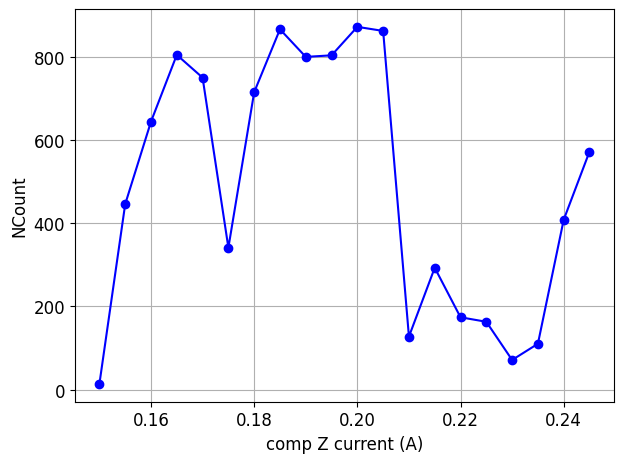

In [8]:
shotNum = "0000"
filePath = folderPath + "/" + shotNum + "/*.h5"

dataSetDict = {
    dskey[groupList[i]]: read_hdf5_file(filePath, groupList[i])
    for i in [0]
}

dataSet = dataSetDict["camera_0"]

print_scanAxis(dataSet)

scanAxis = get_scanAxis(dataSet)

dataSet = auto_rechunk(dataSet)

dataSet = imageAnalyser.get_absorption_images(dataSet)

imageAnalyser.center = (880, 990)
imageAnalyser.span = (150, 200)
imageAnalyser.fraction = (0.1, 0.1)

dataSet_cropOD = imageAnalyser.crop_image(dataSet.OD)
dataSet_cropOD = imageAnalyser.substract_offset(dataSet_cropOD).load()

Ncount = imageAnalyser.get_Ncount(dataSet_cropOD)
Ncount_mean = calculate_mean(Ncount)
Ncount_std = calculate_std(Ncount)

fig = plt.figure()
ax = fig.gca()
Ncount_mean.plot.errorbar(ax=ax, yerr = None, fmt='-ob')
plt.xlabel('comp Z current (A)')
plt.ylabel('NCount')
plt.tight_layout()
plt.grid(visible=1)
plt.show()

# DB.create_global(shotNum, dataSet)
# DB.add_data(shotNum, dataSet_cropOD, engine='xarray')

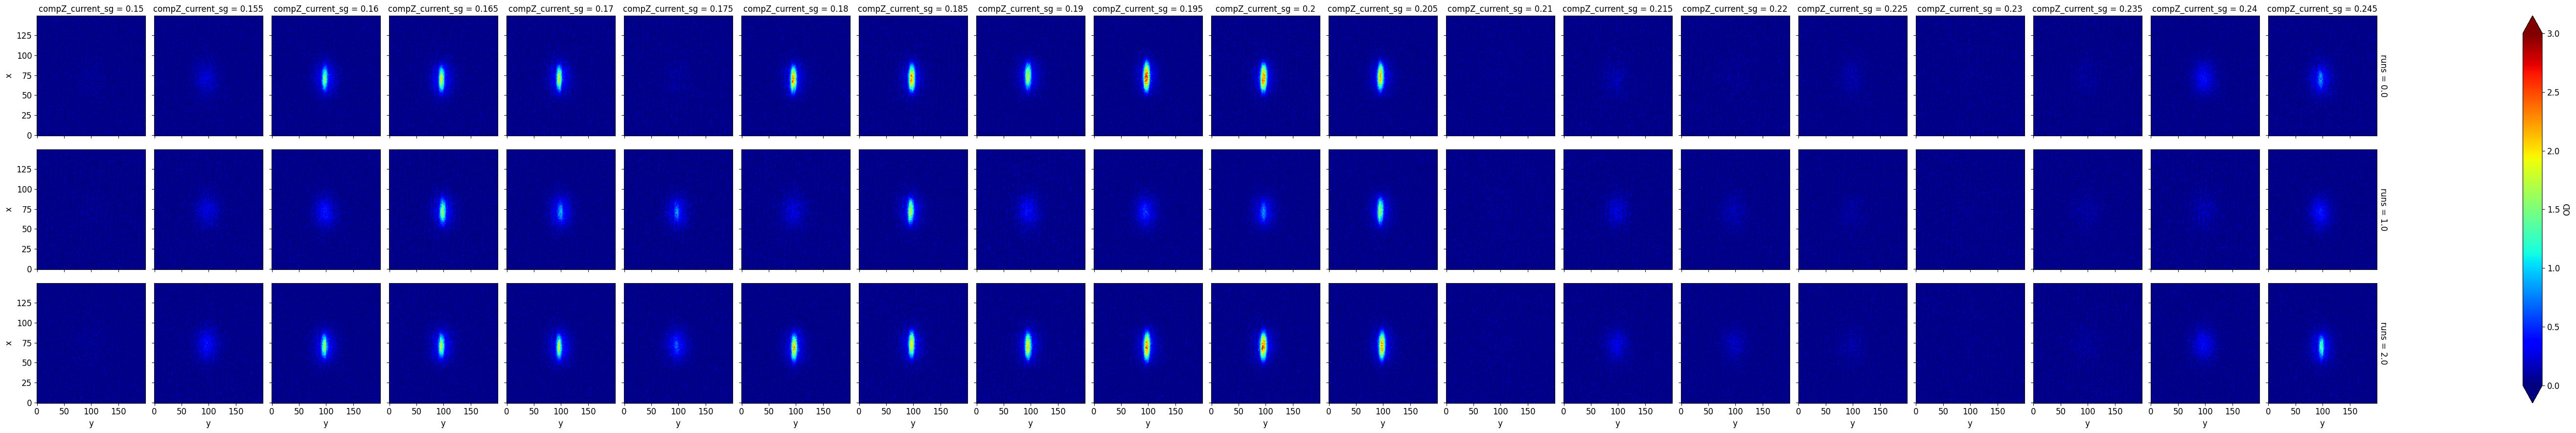

In [9]:
dataSet_cropOD.plot.pcolormesh(cmap='jet', col=scanAxis[0], row=scanAxis[1], vmin=0, vmax=3)

In [10]:
(fitCurve - dataSet_cropOD).plot.pcolormesh(cmap='jet', col=scanAxis[0], row=scanAxis[1], vmin=-0.1, vmax=0.1)

type: name 'fitCurve' is not defined

In [13]:
data = dataSet_cropOD[3,0]
data.to_netcdf('test_data.nc')

In [2]:
with xr.open_dataarray('test_data.nc') as data:
    data

In [3]:
x = np.linspace(500,649, 150)
y = np.linspace(800,999, 200)

shape: (150, 200)
150
200
[500. 501. 502. 503. 504. 505. 506. 507. 508. 509. 510. 511. 512. 513.
 514. 515. 516. 517. 518. 519. 520. 521. 522. 523. 524. 525. 526. 527.
 528. 529. 530. 531. 532. 533. 534. 535. 536. 537. 538. 539. 540. 541.
 542. 543. 544. 545. 546. 547. 548. 549. 550. 551. 552. 553. 554. 555.
 556. 557. 558. 559. 560. 561. 562. 563. 564. 565. 566. 567. 568. 569.
 570. 571. 572. 573. 574. 575. 576. 577. 578. 579. 580. 581. 582. 583.
 584. 585. 586. 587. 588. 589. 590. 591. 592. 593. 594. 595. 596. 597.
 598. 599. 600. 601. 602. 603. 604. 605. 606. 607. 608. 609. 610. 611.
 612. 613. 614. 615. 616. 617. 618. 619. 620. 621. 622. 623. 624. 625.
 626. 627. 628. 629. 630. 631. 632. 633. 634. 635. 636. 637. 638. 639.
 640. 641. 642. 643. 644. 645. 646. 647. 648. 649.]
[800. 801. 802. 803. 804. 805. 806. 807. 808. 809. 810. 811. 812. 813.
 814. 815. 816. 817. 818. 819. 820. 821. 822. 823. 824. 825. 826. 827.
 828. 829. 830. 831. 832. 833. 834. 835. 836. 837. 838. 839. 840. 841.

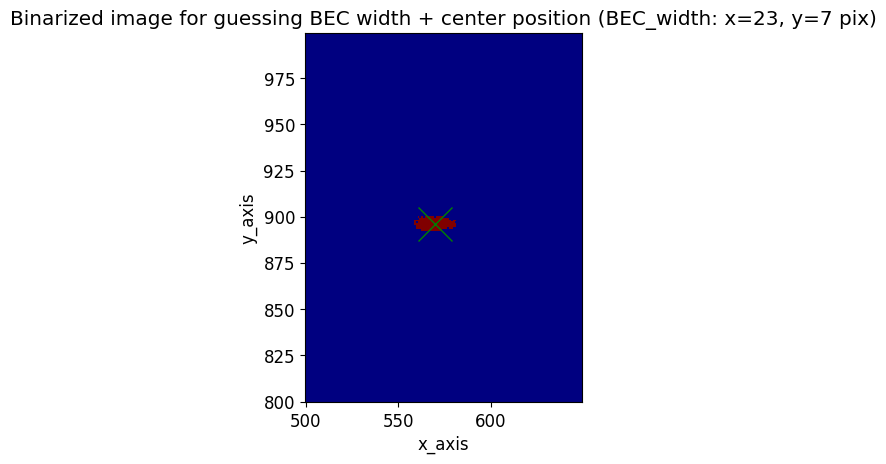

y smaller x, 1d fit along y

1d fit initialization
center = [69.53793103 96.44137931]
BEC widths: [23  7]

1d init fit values
Name          Value      Min      Max   Stderr     Vary     Expr Brute_Step
amp_bec       0.773        0     2.01     None     True     None     None
amp_th        0.773        0     2.01     None     True     None     None
deltax           21        0      200     None     True     None     None
sigma_bec     5.738        0       14     None     True     None     None
sigma_th       14.5        0      inf     None    False 0.632*sigma_bec + 0.518*deltax     None
x0_bec          896      886      906     None     True     None     None
x0_th           896      886      906     None     True     None     None
1d fitted values
x0_bec: 896.208, (init = 896.000), bounds = [886.00 : 906.00] 
x0_th: 897.042, (init = 896.000), bounds = [886.00 : 906.00] 
amp_bec: 1.018, (init = 0.773), bounds = [0.00 : 2.01] 
amp_th: 0.452, (init = 0.773), bounds = [0.00 : 2.01] 
sigma

type: x and y must have same first dimension, but have shapes (200,) and (30000,)

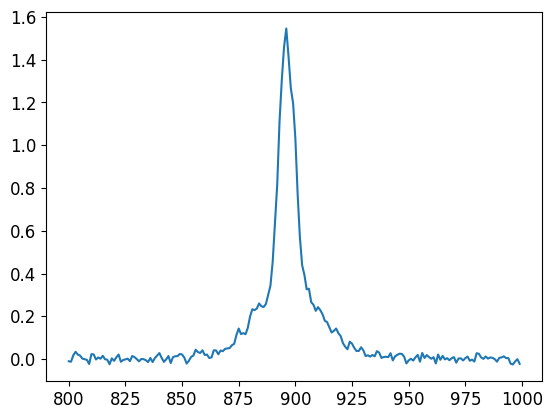

In [4]:

fitModel = DensityProfileBEC2dModel(is_debug=True)
fitAnalyser_1 = FitAnalyser(fitModel, fitDim=2)
params = fitAnalyser_1.guess(data, x=x, y=y, dask="parallelized", guess_kwargs=dict(pureBECThreshold=1.2))
params

In [4]:
data = dataSet_cropOD.chunk((1,1,150,150))#.sel(runs = 0)

fitModel = DensityProfileBEC2dModel()
fitAnalyser_1 = FitAnalyser(fitModel, fitDim=2)

params = fitAnalyser_1.guess(data, dask="parallelized", guess_kwargs=dict(pureBECThreshold=1.2))

fitResult_1 = fitAnalyser_1.fit(data, params).load()

fitCurve = fitAnalyser_1.eval(fitResult_1, x=np.arange(150), y=np.arange(150), dask="parallelized").load()

type: name 'dataSet_cropOD' is not defined

In [ ]:
params.sel(runs=0, compZ_current_sg=0.2).item()

In [ ]:
fitResult_1 = fitAnalyser_1.fit(data.sel(runs=0, compZ_current_sg=0.2), params.sel(runs=0, compZ_current_sg=0.2)).load()

In [ ]:
fitAnalyser_1.get_fit_full_result(fitResult_1)

In [ ]:
fitCurve = fitAnalyser_1.eval(fitResult_1, x=np.arange(150), y=np.arange(150), dask="parallelized").load()

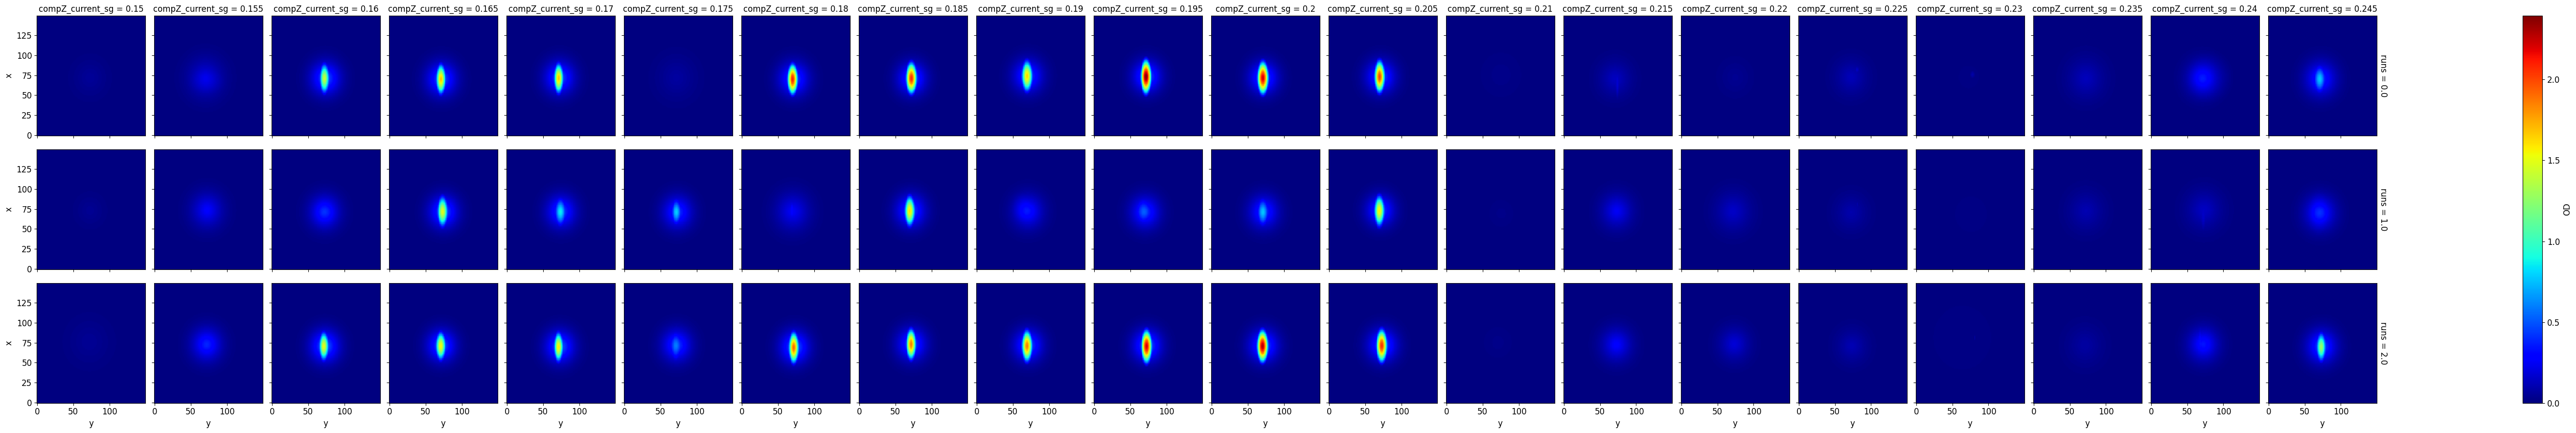

In [7]:
fitCurve.plot.pcolormesh(cmap='jet', col=scanAxis[0], row=scanAxis[1])

In [ ]:
val = fitAnalyser_1.get_fit_value(fitResult_1)
std = fitAnalyser_1.get_fit_std(fitResult_1)

data = val['condensate_fraction']
data_std = std['condensate_fraction']

data.plot.errorbar(x=scanAxis[0], hue=scanAxis[1], fmt='o')
plt.show()

In [ ]:
data = data.sel(runs=[0, 1])
data_mean = calculate_mean(data)
data_std = calculate_std(data)

data_mean.plot.errorbar(x=scanAxis[0], yerr=data_std, fmt='o')

In [ ]:
val = fitAnalyser_1.get_fit_value(fitResult_1)
std = fitAnalyser_1.get_fit_std(fitResult_1)

data = val['BEC_amplitude']
data_std = std['BEC_amplitude']

data.plot.errorbar(x=scanAxis[0], hue=scanAxis[1], fmt='o')
plt.show()

# Check BEC

In [ ]:
shotNum = "0001"
filePath = folderPath + "/" + shotNum + "/*.h5"

dataSetDict = {
    dskey[groupList[i]]: read_hdf5_file(filePath, groupList[i])
    for i in [0]
}

dataSet = dataSetDict["camera_0"]

print_scanAxis(dataSet)

scanAxis = get_scanAxis(dataSet)

dataSet = auto_rechunk(dataSet)

dataSet = imageAnalyser.get_absorption_images(dataSet)

imageAnalyser.center = (880, 990)
imageAnalyser.span = (150, 150)
imageAnalyser.fraction = (0.1, 0.1)

dataSet_cropOD = imageAnalyser.crop_image(dataSet.OD)
dataSet_cropOD = imageAnalyser.substract_offset(dataSet_cropOD).load()

Ncount = imageAnalyser.get_Ncount(dataSet_cropOD)
Ncount_mean = calculate_mean(Ncount)
Ncount_std = calculate_std(Ncount)

fig = plt.figure()
ax = fig.gca()
Ncount_mean.plot.errorbar(ax=ax, yerr = Ncount_std, fmt='-ob')
plt.xlabel('comp Z current (A)')
plt.ylabel('NCount')
plt.tight_layout()
plt.grid(visible=1)
plt.show()

# DB.create_global(shotNum, dataSet)
# DB.add_data(shotNum, dataSet_cropOD, engine='xarray')

In [ ]:
dataSet_cropOD.plot.pcolormesh(cmap='jet', col=scanAxis[0], row=scanAxis[1], vmin=0, vmax=3)

In [ ]:
dataSet_cropOD.chunk((1,1,150,150))#.sel(runs = 0)

fitModel = DensityProfileBEC2dModel()
fitAnalyser_1 = FitAnalyser(fitModel, fitDim=2)

params = fitAnalyser_1.guess(data, dask="parallelized", guess_kwargs=dict(pureBECThreshold=1.2))

# fitResult_1 = fitAnalyser_1.fit(data, params).load()

# fitCurve = fitAnalyser.eval(fitResult, x=np.range(150), y=np.range(150), dask="parallelized").load()

In [ ]:
params.sel(runs=0, compZ_current_sg=0.195).item()

In [ ]:
fitResult_1 = fitAnalyser_1.fit(data.sel(runs=0, compZ_current_sg=0.195), params.sel(runs=0, compZ_current_sg=0.195)).load()

In [ ]:
fitAnalyser_1.get_fit_full_result(fitResult_1)

In [ ]:
fitCurve = fitAnalyser_1.eval(fitResult_1, x=np.arange(150), y=np.arange(150), dask="parallelized").load()

In [ ]:
fitCurve.plot.pcolormesh(cmap='jet', col=scanAxis[0], row=scanAxis[1])

In [ ]:
val = fitAnalyser_1.get_fit_value(fitResult_1)
std = fitAnalyser_1.get_fit_std(fitResult_1)

data = val['condensate_fraction']
data_std = std['condensate_fraction']

data.plot.errorbar(x=scanAxis[0], hue=scanAxis[1], fmt='o')
plt.show()

In [ ]:
data = data.sel(runs=[0, 1])
data_mean = calculate_mean(data)
data_std = calculate_std(data)

data_mean.plot.errorbar(x=scanAxis[0], yerr=data_std, fmt='o')

In [ ]:
fitAnalyser_1.get_fit_full_result(fitResult_1)

In [ ]:
val = fitAnalyser_1.get_fit_value(fitResult_1)
std = fitAnalyser_1.get_fit_std(fitResult_1)

data = val['BEC_amplitude']
data_std = std['BEC_amplitude']

data.plot.errorbar(x=scanAxis[0], hue=scanAxis[1], fmt='o')
plt.show()

In [ ]:
val = fitAnalyser_1.get_fit_value(fitResult_1)
std = fitAnalyser_1.get_fit_std(fitResult_1)

data = val['BEC_amplitude'].mean('runs')* 146.59032426564943 / 1e5
data_std = val['BEC_amplitude'].std('runs')* 146.59032426564943 / 1e5

data.plot.errorbar(yerr=data_std, fmt='o')

plt.ylabel('Atom number in BEC (1e5)')
plt.xlabel('comp Z current (A)')
plt.grid()
plt.show()

In [ ]:
1 / 8.4743e-14 /0.5 / 2.3513**2 * 5.86e-6**2 

In [ ]:
%matplotlib notebook
shotNum = "0024"
filePath = folderPath + "/" + shotNum + "/*.h5"

dataSetDict = {
    dskey[groupList[i]]: read_hdf5_file(filePath, groupList[i], excludeAxis = ['sweep_start_freq', 'sweep_stop_freq'])
    for i in [0]
}

dataSet = dataSetDict["camera_0"]

print_scanAxis(dataSet)

scanAxis = get_scanAxis(dataSet)

dataSet = auto_rechunk(dataSet)

dataSet = imageAnalyser.get_absorption_images(dataSet)

imageAnalyser.center = (135, 990)
imageAnalyser.span = (250, 250)
imageAnalyser.fraction = (0.1, 0.1)

dataSet_cropOD = imageAnalyser.crop_image(dataSet.OD)
dataSet_cropOD = imageAnalyser.substract_offset(dataSet_cropOD).load()

Ncount = imageAnalyser.get_Ncount(dataSet_cropOD)
Ncount_mean = calculate_mean(Ncount)
Ncount_std = calculate_std(Ncount)

fig = plt.figure()
ax = fig.gca()
Ncount_mean.plot.errorbar(ax=ax, yerr = Ncount_std, fmt='ob')

plt.ylabel('NCount')
plt.tight_layout()
#plt.ylim([0, 3500])
plt.grid(visible=1)
plt.show()

In [ ]:
l = list(np.arange(0.15, 0.25, 0.005))
# l = np.logspace(np.log10(250e-6), np.log10(500e-3), num=15)

l = [round(item, 7) for item in l]
random.shuffle(l)

print(l)
print(len(l))
np.mean(l)

In [ ]:
[10.25, 10.255, 10.26, 10.265, 10.27, 10.275, 10.28, 10.285, 10.29, 10.295, 10.3, 10.305, 10.31, 10.315, 10.32, 10.325, 10.33, 10.335, 10.34, 10.345, 10.35, 10.355]

In [ ]:
pixel = 5.86e-6
M     = 0.6827
F = (1/(0.3725*8.4743e-14)) * (pixel / M)**2
NCount = 85000
AtomNumber = NCount * F / 1e8
print(AtomNumber)


In [ ]:
muB = 9.274e-24
hbar = 6.626e-34 / (2 * np.pi)
gJ = 1.24
Delta = 2 * np.pi * 100 * 1e3

Bz = (Delta*hbar) / (muB*gJ)
print(Bz * 1e4)

## ODT 1 Calibration

In [ ]:
v_high = 2.7
"""High Power"""
P_arm1_high = 5.776 * v_high - 0.683

v_mid = 0.2076
"""Intermediate Power"""
P_arm1_mid = 5.815 * v_mid - 0.03651

v_low = 0.0587
"""Low Power"""
P_arm1_low = 5271 * v_low - 27.5

print(round(P_arm1_high, 3))
print(round(P_arm1_mid, 3))
print(round(P_arm1_low, 3))

## ODT 2 Power Calibration

In [ ]:
v = 0.7607
P_arm2 = 2.302 * v - 0.06452
print(round(P_arm2, 3))